# Redes Neuronales

## Introduction

En este ejercicio se implementa una red neuronal para reconocimiento de digitos utilizando keras.

Antes de empezar la ejecución de las partes de codigo correspondienters a los ejercicios, se requiere importar todas las librerias necesarias.

In [11]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [12]:
# Crea tu primer MLP en Keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import np_utils
#from keras.layers.core import Dense, Activation, Dropout

#import pandas as pd


# Fija las semillas aleatorias para la reproducibilidad
#np.random.seed(7) 

Definir el modelo de la red neuronal

Lo primero es instanciar el sistema con la llamada a Sequential(), que crea una red neuronal vacía a la que habrá que agregar las capas correspondientes con la instrucción model.add().

La primera capa es de tipo “Dense”, es decir, completamente conectada con una dimensionalidad de salida de 512, función de activación ReLu y recibe una entrada unidimensional de longitud 400. Esto se debe a que las imágenes del dataset tienen 20x20 píxeles, es decir, 400 valores en total.

A continuación se añade una capa Dropout con parámetro 0.2. Esto se conoce como regularización y su función es prevenir el sobreajuste otorgando a cada neurona una probabilidad del 20% de no activarse durante la fase de entrenamiento. No influye en la topología de nuestra RNA.

Seguidamente agregamos una segunda capa Dense con dimensión de salida 512. No es necesario especificar el tamaño de la entrada en ninguna capa salvo en la primera, ya que Keras puede inferirlo del diseño. Luego, otra capa Dropout con igual función que la anterior y finalmente una capa de salida con 10 posibles valores (0-9) y activación softmax.

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[10 10 10 ...  9  9  9]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]
[[0 0 0 ... 0 0 0]
 [0 0 0 .

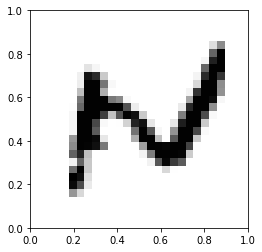

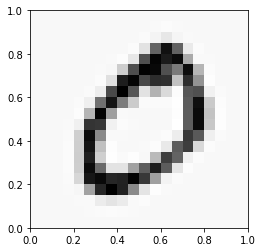

In [13]:
#  datos de entrenamiento almacenados en los arreglos X, y
data = loadmat(os.path.join('Datasets', 'ex3data1.mat'))
X, y = data['X'], data['y'].ravel()

print(X)
print(y)

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train)
print(Y_train)

feature_vector_length = 784
num_classes = 6000

X_train = X_train.reshape(X_train.shape[0], feature_vector_length)

print(X_train)

X_train = X_train.astype('float32')
X_train /= 255

print(X_train)

Y_train = to_categorical(Y_train, num_classes)

print(Y_train)

# Visualize one sample
plt.imshow(X_train[0].reshape(28, 28, order='F'), cmap='Greys', extent=[0, 1, 0, 1])
plt.show()


# Visualize one sample
plt.imshow(X[0].reshape(20, 20, order='F'), cmap='Greys', extent=[0, 1, 0, 1])
plt.show()


In [14]:
# Ingresar imágenes de dígitos de 20x20
input_layer_size  = 400
# Configuration options
numero_caracteristicas = 400
# num_labels = 10

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

# establecer el dígito cero en 0, en lugar del 10 asignado a este conjunto de datos
# Esto se hace debido a que el conjunto de datos se utilizó en MATLAB donde no hay índice 0
y[y == 10] = 0

m = y.size

# Convert target classes to categorical ones
y = to_categorical(y, num_labels)


# Visualize one sample


In [16]:
# crea el modelo


# Set the input shape
#input_shape = (feature_vector_length,)
#input_shape = (numero_caracteristicas,)

#print(f'Feature shape: {input_shape}')

# Create the model
#model = Sequential()
#model.add(Dense(400, input_shape=input_shape, activation='relu'))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(num_labels, activation='softmax'))

# input_shape = 400
# Create the model
model = Sequential()
model.add(Dense(50, input_dim=input_shape, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(num_labels, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                20050     
_________________________________________________________________
dense_6 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
Total params: 21,280
Trainable params: 21,280
Non-trainable params: 0
_________________________________________________________________


Modelo de compilación de la Red Neuronal

Al compilar, debemos especicar algunas propiedades adicionales necesarias para la formación de la red. Recuerde que
entrenar una red signica encontrar el mejor conjunto de pesos para hacer predicciones para este problema.
Debemos especicar la función de pérdida a utilizar para evaluar un conjunto de pesos, el optimizador utilizado para buscar a
través de diferentes pesos para la red y cualquier métrica opcional que nos gustaría recopilar y reportar durante el
entrenamiento.
En este caso, utilizaremos la pérdida logarítmica, que para un problema de clasicación binaria se dene en Keras como
“binary_crossentropy”. También utilizaremos el algoritmo de descenso de gradiente eciente “adam” por su alta eciencia en
estos problemas.
Finalmente, debido a que es un problema de clasicación, recopilaremos y reportaremos la exactitud de la clasicación como la
métrica.

Mediante la llamada a compile le proporcionamos al sistema la función de pérdidas que queremos minimizar durante el entrenamiento, el tipo de algoritmo que usaremos para hacerlo y las métricas que nos gustaría conocer. En un problema de clasificación como el de este ejemplo, siempre querremos ver la medida de precisión (accuracy) de nuestro modelo.

In [26]:
# Compila el modelo
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
# model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
# Configure the model and start training

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=500, batch_size=250, verbose=2, validation_split=0.2)

# Configure the model and start training
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/500
 - 0s - loss: 0.0337 - accuracy: 0.9937 - val_loss: 18.0219 - val_accuracy: 0.0000e+00
Epoch 2/500
 - 0s - loss: 0.0304 - accuracy: 0.9958 - val_loss: 18.5467 - val_accuracy: 0.0000e+00
Epoch 3/500
 - 0s - loss: 0.0267 - accuracy: 0.9962 - val_loss: 19.3646 - val_accuracy: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.0257 - accuracy: 0.9970 - val_loss: 20.3983 - val_accuracy: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.0237 - accuracy: 0.9970 - val_loss: 20.6211 - val_accuracy: 0.0000e+00
Epoch 6/500
 - 0s - loss: 0.0229 - accuracy: 0.9962 - val_loss: 21.3024 - val_accuracy: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.0212 - accuracy: 0.9975 - val_loss: 21.6188 - val_accuracy: 0.0000e+00
Epoch 8/500
 - 0s - loss: 0.0195 - accuracy: 0.9973 - val_loss: 21.8848 - val_accuracy: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.0179 - accuracy: 0.9980 - val_loss: 22.3655 - val_accuracy: 0.0000e+00
Epoch 10/500
 - 0s - loss: 0.0173 - accuracy: 0.9983 - val_lo

Epoch 83/500
 - 0s - loss: 8.0084e-04 - accuracy: 1.0000 - val_loss: 33.3354 - val_accuracy: 0.0000e+00
Epoch 84/500
 - 0s - loss: 7.8751e-04 - accuracy: 1.0000 - val_loss: 33.3703 - val_accuracy: 0.0000e+00
Epoch 85/500
 - 0s - loss: 7.6865e-04 - accuracy: 1.0000 - val_loss: 33.4791 - val_accuracy: 0.0000e+00
Epoch 86/500
 - 0s - loss: 7.4421e-04 - accuracy: 1.0000 - val_loss: 33.5122 - val_accuracy: 0.0000e+00
Epoch 87/500
 - 0s - loss: 7.1103e-04 - accuracy: 1.0000 - val_loss: 33.6119 - val_accuracy: 0.0000e+00
Epoch 88/500
 - 0s - loss: 6.9986e-04 - accuracy: 1.0000 - val_loss: 33.6844 - val_accuracy: 0.0000e+00
Epoch 89/500
 - 0s - loss: 6.8493e-04 - accuracy: 1.0000 - val_loss: 33.7266 - val_accuracy: 0.0000e+00
Epoch 90/500
 - 0s - loss: 6.6341e-04 - accuracy: 1.0000 - val_loss: 33.8097 - val_accuracy: 0.0000e+00
Epoch 91/500
 - 0s - loss: 6.4825e-04 - accuracy: 1.0000 - val_loss: 33.9147 - val_accuracy: 0.0000e+00
Epoch 92/500
 - 0s - loss: 6.3579e-04 - accuracy: 1.0000 - val_l

Epoch 162/500
 - 0s - loss: 1.6511e-04 - accuracy: 1.0000 - val_loss: 37.6734 - val_accuracy: 0.0000e+00
Epoch 163/500
 - 0s - loss: 1.6288e-04 - accuracy: 1.0000 - val_loss: 37.7394 - val_accuracy: 0.0000e+00
Epoch 164/500
 - 0s - loss: 1.6047e-04 - accuracy: 1.0000 - val_loss: 37.8197 - val_accuracy: 0.0000e+00
Epoch 165/500
 - 0s - loss: 1.5896e-04 - accuracy: 1.0000 - val_loss: 37.8069 - val_accuracy: 0.0000e+00
Epoch 166/500
 - 0s - loss: 1.5576e-04 - accuracy: 1.0000 - val_loss: 37.8544 - val_accuracy: 0.0000e+00
Epoch 167/500
 - 0s - loss: 1.5293e-04 - accuracy: 1.0000 - val_loss: 37.8976 - val_accuracy: 0.0000e+00
Epoch 168/500
 - 0s - loss: 1.5031e-04 - accuracy: 1.0000 - val_loss: 37.9463 - val_accuracy: 0.0000e+00
Epoch 169/500
 - 0s - loss: 1.4833e-04 - accuracy: 1.0000 - val_loss: 37.9884 - val_accuracy: 0.0000e+00
Epoch 170/500
 - 0s - loss: 1.4603e-04 - accuracy: 1.0000 - val_loss: 38.0137 - val_accuracy: 0.0000e+00
Epoch 171/500
 - 0s - loss: 1.4525e-04 - accuracy: 1.00

 - 0s - loss: 5.5236e-05 - accuracy: 1.0000 - val_loss: 40.5783 - val_accuracy: 0.0000e+00
Epoch 241/500
 - 0s - loss: 5.4432e-05 - accuracy: 1.0000 - val_loss: 40.6122 - val_accuracy: 0.0000e+00
Epoch 242/500
 - 0s - loss: 5.3660e-05 - accuracy: 1.0000 - val_loss: 40.6535 - val_accuracy: 0.0000e+00
Epoch 243/500
 - 0s - loss: 5.3033e-05 - accuracy: 1.0000 - val_loss: 40.6961 - val_accuracy: 0.0000e+00
Epoch 244/500
 - 0s - loss: 5.2124e-05 - accuracy: 1.0000 - val_loss: 40.7162 - val_accuracy: 0.0000e+00
Epoch 245/500
 - 0s - loss: 5.1667e-05 - accuracy: 1.0000 - val_loss: 40.7606 - val_accuracy: 0.0000e+00
Epoch 246/500
 - 0s - loss: 5.0887e-05 - accuracy: 1.0000 - val_loss: 40.8122 - val_accuracy: 0.0000e+00
Epoch 247/500
 - 0s - loss: 5.0274e-05 - accuracy: 1.0000 - val_loss: 40.8066 - val_accuracy: 0.0000e+00
Epoch 248/500
 - 0s - loss: 4.9767e-05 - accuracy: 1.0000 - val_loss: 40.8340 - val_accuracy: 0.0000e+00
Epoch 249/500
 - 0s - loss: 4.9054e-05 - accuracy: 1.0000 - val_loss:

Epoch 319/500
 - 0s - loss: 2.1679e-05 - accuracy: 1.0000 - val_loss: 42.9260 - val_accuracy: 0.0000e+00
Epoch 320/500
 - 0s - loss: 2.1386e-05 - accuracy: 1.0000 - val_loss: 42.9796 - val_accuracy: 0.0000e+00
Epoch 321/500
 - 0s - loss: 2.1168e-05 - accuracy: 1.0000 - val_loss: 42.9926 - val_accuracy: 0.0000e+00
Epoch 322/500
 - 0s - loss: 2.0836e-05 - accuracy: 1.0000 - val_loss: 43.0328 - val_accuracy: 0.0000e+00
Epoch 323/500
 - 0s - loss: 2.0666e-05 - accuracy: 1.0000 - val_loss: 43.0420 - val_accuracy: 0.0000e+00
Epoch 324/500
 - 0s - loss: 2.0409e-05 - accuracy: 1.0000 - val_loss: 43.0826 - val_accuracy: 0.0000e+00
Epoch 325/500
 - 0s - loss: 2.0219e-05 - accuracy: 1.0000 - val_loss: 43.1138 - val_accuracy: 0.0000e+00
Epoch 326/500
 - 0s - loss: 2.0033e-05 - accuracy: 1.0000 - val_loss: 43.1246 - val_accuracy: 0.0000e+00
Epoch 327/500
 - 0s - loss: 1.9822e-05 - accuracy: 1.0000 - val_loss: 43.1328 - val_accuracy: 0.0000e+00
Epoch 328/500
 - 0s - loss: 1.9598e-05 - accuracy: 1.00

Epoch 398/500
 - 0s - loss: 9.4694e-06 - accuracy: 1.0000 - val_loss: 44.9268 - val_accuracy: 0.0000e+00
Epoch 399/500
 - 0s - loss: 9.4243e-06 - accuracy: 1.0000 - val_loss: 44.9861 - val_accuracy: 0.0000e+00
Epoch 400/500
 - 0s - loss: 9.2825e-06 - accuracy: 1.0000 - val_loss: 44.9914 - val_accuracy: 0.0000e+00
Epoch 401/500
 - 0s - loss: 9.1810e-06 - accuracy: 1.0000 - val_loss: 45.0113 - val_accuracy: 0.0000e+00
Epoch 402/500
 - 0s - loss: 9.0905e-06 - accuracy: 1.0000 - val_loss: 45.0502 - val_accuracy: 0.0000e+00
Epoch 403/500
 - 0s - loss: 8.9980e-06 - accuracy: 1.0000 - val_loss: 45.0641 - val_accuracy: 0.0000e+00
Epoch 404/500
 - 0s - loss: 8.9175e-06 - accuracy: 1.0000 - val_loss: 45.0860 - val_accuracy: 0.0000e+00
Epoch 405/500
 - 0s - loss: 8.8364e-06 - accuracy: 1.0000 - val_loss: 45.1281 - val_accuracy: 0.0000e+00
Epoch 406/500
 - 0s - loss: 8.7749e-06 - accuracy: 1.0000 - val_loss: 45.1175 - val_accuracy: 0.0000e+00
Epoch 407/500
 - 0s - loss: 8.6602e-06 - accuracy: 1.00

Epoch 477/500
 - 0s - loss: 4.3594e-06 - accuracy: 1.0000 - val_loss: 46.7667 - val_accuracy: 0.0000e+00
Epoch 478/500
 - 0s - loss: 4.3138e-06 - accuracy: 1.0000 - val_loss: 46.7713 - val_accuracy: 0.0000e+00
Epoch 479/500
 - 0s - loss: 4.2725e-06 - accuracy: 1.0000 - val_loss: 46.8091 - val_accuracy: 0.0000e+00
Epoch 480/500
 - 0s - loss: 4.2388e-06 - accuracy: 1.0000 - val_loss: 46.8358 - val_accuracy: 0.0000e+00
Epoch 481/500
 - 0s - loss: 4.1819e-06 - accuracy: 1.0000 - val_loss: 46.8512 - val_accuracy: 0.0000e+00
Epoch 482/500
 - 0s - loss: 4.1527e-06 - accuracy: 1.0000 - val_loss: 46.8727 - val_accuracy: 0.0000e+00
Epoch 483/500
 - 0s - loss: 4.1168e-06 - accuracy: 1.0000 - val_loss: 46.8890 - val_accuracy: 0.0000e+00
Epoch 484/500
 - 0s - loss: 4.0693e-06 - accuracy: 1.0000 - val_loss: 46.9202 - val_accuracy: 0.0000e+00
Epoch 485/500
 - 0s - loss: 4.0473e-06 - accuracy: 1.0000 - val_loss: 46.9400 - val_accuracy: 0.0000e+00
Epoch 486/500
 - 0s - loss: 3.9918e-06 - accuracy: 1.00

Modelo de ajuste de la Red Neuronal

Hemos denido nuestro modelo y lo hemos compilado listo para un cálculo eciente. Ahora es el momento de ejecutar el
modelo sobre algunos datos. Podemos entrenar o ajustar nuestro modelo a los datos cargados llamando a la función t() en el
modelo.

El proceso de entrenamiento se ejecutará para un número jo de iteraciones denominado epochs o épocas. También
podemos establecer el número de instancias que se evalúan antes de que se realice una actualización de peso en la red
llamada batch_size y establecerlo mediante el argumento batch_size. Para este problema utilizaremos un pequeño número de epochs (150) y un batch_size relativamente pequeño (10). Una vez más, estos pueden ser elegidos experimentalmente por
ensayo y error.

In [27]:
# Test the model after training
test_results = model.evaluate(X, y, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')


#test_results = model.evaluate(X_test, Y_test, verbose=1)
#print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

5000/5000 [==============================] - 0s 18us/step
Test results - Loss: 9.453419677299966 - Accuracy: 80.0000011920929%


In [28]:
# Ajusta el modelo
# model.fit(X, y, epochs=150, batch_size=10)
#batch_size = 10
#model.fit(X, y, batch_size=batch_size, epochs=150)


Evaluar el modelo de la Red Neuronal

Hemos entrenado nuestra red neuronal en todo el conjunto de datos y podemos evaluar el rendimiento de la red en el mismo
conjunto de datos.

Esto sólo nos dará una idea de lo bien que hemos modelado el conjunto de datos, pero no nos dará una idea de lo bien que el
algoritmo podría funcionar con los nuevos datos. Hemos hecho esto por simplicidad, pero lo ideal sería que separara sus datos
en conjuntos de datos de entreno y de prueba para la formación y evaluación de su modelo. Resaltamos esta frase ya que es
importante:

lo ideal sería que separara sus datos en conjuntos de datos de entreno y de prueba para la formación y evaluación de su
modelo.

Usted puede evaluar su modelo en su conjunto de datos de entrenamiento usando la función evaluate() y pasarle la misma
entrada y salida usada para entrenar el modelo.

Esto generará una predicción para cada par de entrada y salida y recogerá las puntuaciones, incluyendo la pérdida media y
cualquier métrica que haya congurado, como la precisión.

In [29]:
# evalua el modelo
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5000/5000 [==============================] - 0s 19us/step

accuracy: 80.00%


Predicción

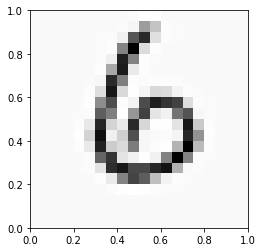

[6]


In [35]:
# print(X[0, :])
Xnew = X[3444].reshape(1, 400)
# print(Xnew)
# Visualize one sample
plt.imshow(X[3444].reshape(20, 20, order='F'), cmap='Greys', extent=[0, 1, 0, 1])
plt.show()

ynew = model.predict_classes(Xnew)
print(ynew)

### 1.2 Visualización de los datos

Se comenzará visualizando un subconjunto del conjunto de entrenamiento. Se selecciona al azar, 100 filas de `X` y pasa esas filas a la función` displayData`. Esta función asigna cada fila a una imagen en escala de grises de 20 píxeles por 20 píxeles y muestra las imágenes juntas.

In [11]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_width, example_width, order='F'),
                  cmap='Greys', extent=[0, 1, 0, 1])
        ax.axis('off')

In [12]:
def sigmoid(z):
    """
    Computes the sigmoid of z.
    """
    return 1.0 / (1.0 + np.exp(-z))

## 2 Neural Networks

In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier (You could add more features - such as polynomial features - to logistic regression, but that can be very expensive to train).

In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week’s exercise, you will write the backpropagation algorithm for learning the neural network parameters. 

We start by first reloading and visualizing the dataset which contains the MNIST handwritten digits (this is the same as we did in the first part of this exercise, we reload it here to ensure the variables have not been modified). 


### 2.1 Model representation 

Our neural network is shown in the following figure.

![Neural network](Figures/neuralnetwork.png)

It has 3 layers: an input layer, a hidden layer and an output layer. Recall that our inputs are pixel values of digit images. Since the images are of size 20×20, this gives us 400 input layer units (excluding the extra bias unit which always outputs +1). As before, the training data will be loaded into the variables X and y. 

You have been provided with a set of network parameters ($\Theta^{(1)}$, $\Theta^{(2)}$) already trained by us. These are stored in `ex3weights.mat`. The following cell loads those parameters into  `Theta1` and `Theta2`. The parameters have dimensions that are sized for a neural network with 25 units in the second layer and 10 output units (corresponding to the 10 digit classes).

In [13]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the .mat file, which returns a dictionary 
weights = loadmat(os.path.join('Datasets', 'ex3weights.mat'))

# get the model weights from the dictionary
# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

In [14]:
Theta1.shape

(25, 401)

<a id="section4"></a>
### 2.2 Feedforward Propagation and Prediction

Now you will implement feedforward propagation for the neural network. You will need to complete the code in the function `predict` to return the neural network’s prediction. You should implement the feedforward computation that computes $h_\theta(x^{(i)})$ for every example $i$ and returns the associated predictions. Similar to the one-vs-all classification strategy, the prediction from the neural network will be the label that has the largest output $\left( h_\theta(x) \right)_k$.

<div class="alert alert-box alert-warning">
**Implementation Note:** The matrix $X$ contains the examples in rows. When you complete the code in the function `predict`, you will need to add the column of 1’s to the matrix. The matrices `Theta1` and `Theta2` contain the parameters for each unit in rows. Specifically, the first row of `Theta1` corresponds to the first hidden unit in the second layer. In `numpy`, when you compute $z^{(2)} = \theta^{(1)}a^{(1)}$, be sure that you index (and if necessary, transpose) $X$ correctly so that you get $a^{(l)}$ as a 1-D vector.
</div>
<a id="predict"></a>

In [15]:
def predict(Theta1, Theta2, X):
    """
    Predict the label of an input given a trained neural network.
    
    Parameters
    ----------
    Theta1 : array_like
        Weights for the first layer in the neural network.
        It has shape (2nd hidden layer size x input size)
    
    Theta2: array_like
        Weights for the second layer in the neural network. 
        It has shape (output layer size x 2nd hidden layer size)
    
    X : array_like
        The image inputs having shape (number of examples x image dimensions).
    
    Return 
    ------
    p : array_like
        Predictions vector containing the predicted label for each example.
        It has a length equal to the number of examples.
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned neural
    network. You should set p to a vector containing labels 
    between 0 to (num_labels-1).
     
    Hint
    ----
    This code can be done all vectorized using the numpy argmax function.
    In particular, the argmax function returns the index of the  max element,
    for more information see '?np.argmax' or search online. If your examples
    are in rows, then, you can use np.argmax(A, axis=1) to obtain the index
    of the max for each row.
    
    Note
    ----
    Remember, we have supplied the `sigmoid` function in the `utils.py` file. 
    You can use this function by calling `utils.sigmoid(z)`, where you can 
    replace `z` by the required input variable to sigmoid.
    """
    # Make sure the input has two dimensions
    if X.ndim == 1:
        X = X[None]  # promote to 2-dimensions
    
    # useful variables
    m = X.shape[0]
    num_labels = Theta2.shape[0]

    # You need to return the following variables correctly 
    p = np.zeros(X.shape[0])

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    a2 = sigmoid(X.dot(Theta1.T))
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    
    p = np.argmax(sigmoid(a2.dot(Theta2.T)), axis = 1)

    return p

Once you are done, call your predict function using the loaded set of parameters for `Theta1` and `Theta2`. You should see that the accuracy is about 97.5%.

In [16]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: {:.1f}%'.format(np.mean(pred == y) * 100))

Training Set Accuracy: 0.0%


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


After that, we will display images from the training set one at a time, while at the same time printing out the predicted label for the displayed image. 

Run the following cell to display a single image the the neural network's prediction. You can run the cell multiple time to see predictions for different images.

In [17]:
if indices.size > 0:
    i, indices = indices[0], indices[1:]
    displayData(X[i, :], figsize=(4, 4))
    pred = predict(Theta1, Theta2, X[i, :])
    print('Neural Network Prediction: {}'.format(*pred))
else:
    print('No more images to display!')

NameError: name 'indices' is not defined